<a href="https://colab.research.google.com/github/cprogramcourse/road-seg/blob/main/prediction_aicrowd_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/gist/aicrowd-bot/da985d0d6b521714ceea0e02886b1b97#scrollTo=9xvwKzfockaM
https://www.aicrowd.com/showcase/solution-for-0-975-scene-segmentation-using-deeplabv3plus

https://smp.readthedocs.io/en/latest/encoders_timm.html
https://github.com/qubvel/segmentation_models.pytorch/issues/535
https://segmentation-modelspytorch.readthedocs.io/en/latest/#installation
https://smp.readthedocs.io/en/latest/models.html#deeplabv3
https://smp.readthedocs.io/en/latest/encoders_timm.html
https://smp.readthedocs.io/en/latest/encoders.html

aicrowd-semantic-segmentaion notebook discription

- installing segmentaion_models_pytorch@v0.2.1 specific versions work
- installing aicrowd-cli, I don't know is it necessary or not!?
- importing CamVid dataset or ant other datasets, the CamVid creastes data folder which is needed
- mounting google drive
- unziping
- importin some libs
- setting path
- if necessary for ram problem, resizing dataset images
- changing n_classes to the number of classes
- spliting dataset. We need just two folders, one for images, one for masks.
- making dircs
- copying images
- showing some examples, 
- defining semanticsegmentationDataset class
- creating training and validation dataset
- reading the image and corrosponding segmentation
- showing some ex
- defining the model with different weights and paramaters
- setting up traing epoch to train the model
- runing and saving
- 

In [1]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch@v0.2.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch (to revision v0.2.1) to /tmp/pip-req-build-hzifcdqb
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-hzifcdqb
  Running command git checkout -q a288d337821716ad67125127b5dd96a1cd833391
     |████████████████████████████████| 58 kB 1.5 MB/s 
     |████████████████████████████████| 376 kB 6.8 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.2.1-py3-none-any.whl size=88598 sha256=823bfd4aed5c1bf54c429c12c50a5ba124e56eb7138d92d4bc3ae12e190b17a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-p6qe55r_/wheels/e0/6e/5f/380a81fbbe964b1c7fcd8213dd4a1d754fe2480fed39821151
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=cc8381f5001f2cd6bd4f1554275ba1320894ad22630ba5b0675c6

In [2]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip uninstall natsort 
!pip install natsort

Found existing installation: natsort 5.5.0
Uninstalling natsort-5.5.0:
  Would remove:
    /usr/local/bin/natsort
    /usr/local/lib/python3.7/dist-packages/natsort-5.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/natsort/*
Proceed (y/n)? y
  Successfully uninstalled natsort-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from natsort import os_sorted

In [3]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 214 kB 35.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 170 kB 49.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.1.0
    Uninstalling pyzmq-23.1.0:
      Successfully uninstalled pyzmq-23.1.0
  Attempting uninstall: python-slugify
    Found existing installation: python-slugify 6.1.2
    Uninstalling python-slugify-6.1.2:
 

In [8]:
!ls

sample_data


In [4]:
%cd content

[Errno 2] No such file or directory: 'content'
/content


This part is loading CamVid dataset

In [5]:
import os

DATA_DIR = '/content/data/CamVid/test'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

Loading data...
Done!


This part is a test for a custom dataset

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [9]:
!unzip /content/gdrive/MyDrive/pytorchdataset/test.zip -d /content/data

Archive:  /content/gdrive/MyDrive/pytorchdataset/test.zip
  inflating: /content/data/test/0.bmp  
  inflating: /content/data/test/1.bmp  
  inflating: /content/data/test/2.bmp  
  inflating: /content/data/test/3.bmp  


In [7]:
# Pytorch 
import torch
from torch import nn
import segmentation_models_pytorch as smp
from torch.utils.data import Dataset, DataLoader

# Reading Dataset, vis and miscellaneous
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import torch.nn as nn
from natsort import natsorted
from tqdm.notebook import tqdm
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [8]:
# 30 for cityscapes 32 for CamVid, defauld code was 23
#n_classes = 32 
#n_classes = 30 
n_classes = 2 



def create_df():
    name = []
    for dirname, _, filenames in os.walk(IMAGE_PATH):
        for filename in filenames:
            name.append(filename.split('.')[0])
    
    return pd.DataFrame({'id': name}, index = np.arange(0, len(name)))

df = create_df()
print('Total Images: ', len(df))

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-8-3d68e2cc35c4>:16 in <module>                                             │
│ <ipython-input-8-3d68e2cc35c4>:10 in create_df                                            │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'IMAGE_PATH' is not defined

In [10]:
class SemanticSegmentationDataset(Dataset):
    
    def __init__(self, img_directory=None, label_directory=None, train=True):
        self.img_directory = img_directory
        self.label_directory = label_directory            

        if img_directory != None:
            if train:
                self.img_list = natsorted(os.listdir(img_directory))
            else:
                self.img_list = natsorted(os.listdir(img_directory))

        if train:
            self.label_list = natsorted(os.listdir(label_directory))

        self.train = train

        # self.labels = list(range(0, 23))
        # for Camvid
        # self.labels = list(range(0, 32))

        # for cityscaper
        #self.labels = list(range(0, 30))

        # for subject
        self.labels = list(range(0, 2))

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):

        # Reading the image
        img = Image.open(os.path.join(self.img_directory, self.img_list[idx]))
        img = img.convert("L")

        if self.train == True:
          
            # Reading the mak image
            mask = Image.open(os.path.join(self.label_directory, self.label_list[idx]))

            # mask.show()
            img = np.array(img, dtype=np.float32)
            mask = np.array(mask, dtype=np.float32)

            # Change image channel ordering
            img = img[np.newaxis, :, :]


            # Normalizing images
            img = torch.from_numpy(img)
            img = img.float()/255

            binary_mask = np.array([(mask == v) for v in list(self.labels)])
            binary_mask = np.stack(binary_mask, axis=-1).astype('float')

            mask_preprocessed = binary_mask.transpose(2, 0, 1)
            mask_preprocessed = torch.from_numpy(mask_preprocessed)

            return img, mask_preprocessed
        
        # If reading test dataset, only return image 
        else:
          
            img = np.array(img, dtype=np.float32)
            img = img[np.newaxis, :, :]
            # img = np.moveaxis(img, -1, 0)

            # Normalizing images
            img = torch.from_numpy(img)
            img = img.float()/255
          
            return img

In [11]:
#ENCODER = 'timm-efficientnet-b1'
ENCODER = 'tu-gluon_xception65'

ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = "softmax2d" 
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.DeepLabV3(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    # classes=len(train_dataset.labels),
    classes=2,    
    in_channels=1,
    activation=ACTIVATION,
)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/gluon_xception-7015a15c.pth" to /root/.cache/torch/hub/checkpoints/gluon_xception-7015a15c.pth


In [12]:
import segmentation_models_pytorch as smp
# using DiceLoss
loss = smp.utils.losses.DiceLoss()

# using multiple metrics to train the model
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.Fscore(threshold=0.5),
    smp.utils.metrics.Accuracy(threshold=0.5),
    smp.utils.metrics.Recall(threshold=0.5),
    smp.utils.metrics.Precision(threshold=0.5),
]

# Using SGD optimizer
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [13]:
# Setting up training epoch to train the model
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss,
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    #device='cpu',
    verbose=True,
    )

val_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss,
    metrics=metrics,
    device=DEVICE, 
    #device='cpu',
    verbose=True,
    )

In [14]:
%cd content

/content


In [15]:
!cp '/content/gdrive/MyDrive/seg_weights/best_model.pth' './'

In [16]:
model = torch.load("./best_model.pth")


**Generating Predictions¶**




In [17]:
data_dir_ = "./data"


test_dataset = SemanticSegmentationDataset(img_directory=os.path.join(data_dir_,"/content/data/test"), train=False)
test_loader = DataLoader(test_dataset, batch_size=1, num_workers=2, shuffle=False, drop_last=False)



In [18]:
%cd content
!rm -rf segmentation
!mkdir segmentation

[Errno 2] No such file or directory: 'content'
/content


In [19]:
# Generating Model Predictions


for n, batch in enumerate(tqdm(test_loader)):

    # Getting the predictions
    predictions = model.predict(batch.to(DEVICE)).cpu() 
  
    # Converting the predictions to right format
    prediction_mask = (predictions.squeeze().cpu().numpy())   
    prediction_mask = np.transpose(prediction_mask, (1, 2, 0))

    # Getting individual channel and combining them into single image
    prediction_mask_gray = np.zeros((prediction_mask.shape[0],prediction_mask.shape[1]))
    for ii in range(prediction_mask.shape[2]):
        prediction_mask_gray = prediction_mask_gray + ii*prediction_mask[:,:,ii].round()


    # Saving the image
    prediction_mask_gray = Image.fromarray(prediction_mask_gray.astype(np.uint8))
    prediction_mask_gray.save(os.path.join("segmentation", f"{n}.png"))

  0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
!zip -r /content/segmentation.zip /content/segmentation

  adding: content/segmentation/ (stored 0%)
  adding: content/segmentation/13.png (stored 0%)
  adding: content/segmentation/20.png (stored 0%)
  adding: content/segmentation/8.png (deflated 0%)
  adding: content/segmentation/6.png (deflated 0%)
  adding: content/segmentation/21.png (stored 0%)
  adding: content/segmentation/24.png (stored 0%)
  adding: content/segmentation/14.png (stored 0%)
  adding: content/segmentation/10.png (stored 0%)
  adding: content/segmentation/12.png (stored 0%)
  adding: content/segmentation/23.png (stored 0%)
  adding: content/segmentation/5.png (stored 0%)
  adding: content/segmentation/3.png (stored 0%)
  adding: content/segmentation/22.png (stored 0%)
  adding: content/segmentation/18.png (stored 0%)
  adding: content/segmentation/7.png (stored 0%)
  adding: content/segmentation/19.png (stored 0%)
  adding: content/segmentation/9.png (stored 0%)
  adding: content/segmentation/0.png (deflated 0%)
  adding: content/segmentation/1.png (stored 0%)
  adding

In [22]:
from google.colab import files
files.download('/content/segmentation.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
7# Creating the testing dataset
data_dir_ = "./data"

test_dataset = SemanticSegmentationDataset(img_directory=os.path.join(data_dir_,"/content/data/test"),
                                           label_directory=os.path.join("segmentation"))
test_loader = DataLoader(test_dataset, batch_size=4, num_workers=0, shuffle=False, drop_last=False)

In [21]:
# Reading the image and corrosponding segmentation
image_batch, segmentation_batch = next(iter(test_loader))

image_batch.shape, segmentation_batch.shape

(torch.Size([4, 1, 240, 320]), torch.Size([4, 2, 240, 320]))

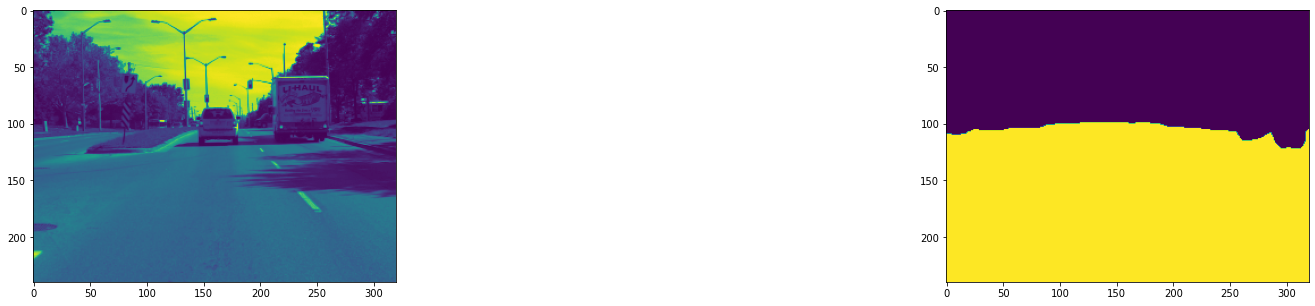

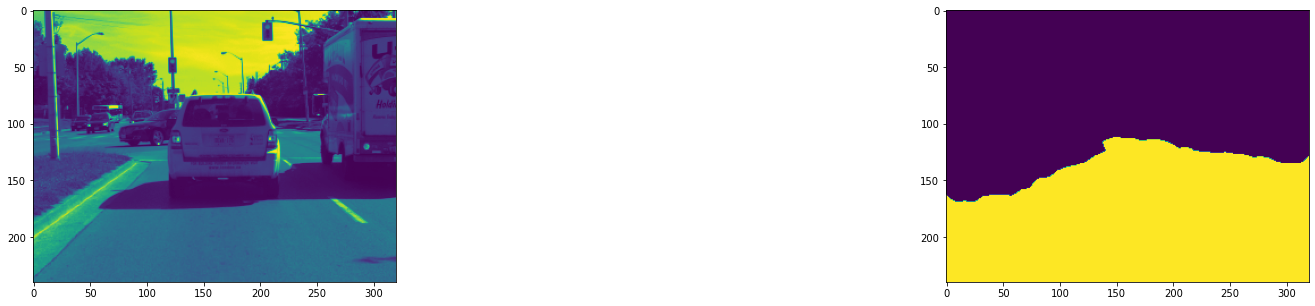

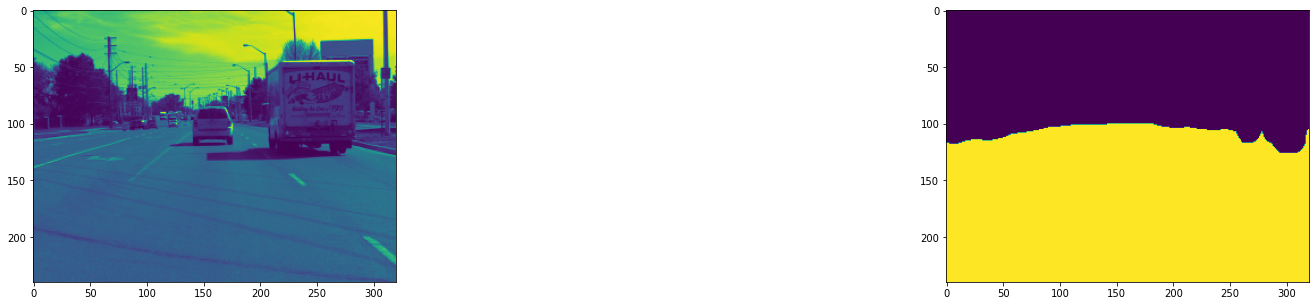

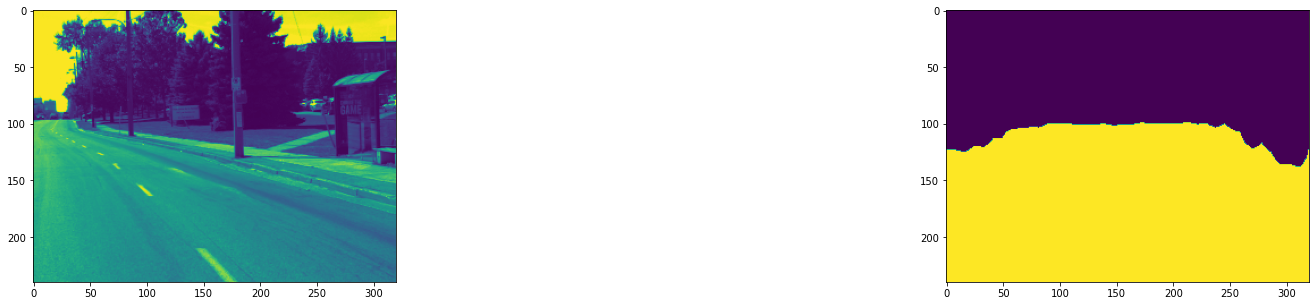

In [22]:
plt.rcParams["figure.figsize"] = (30,5)

# Going through each image and segmentation
for image, segmentation in zip(image_batch, segmentation_batch):

    # Change the channel ordering
    image = np.moveaxis(image.numpy()*255, 0, -1)

    # Showing the image
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image[:, :, 0])
    plt.subplot(1,2,2)
    plt.imshow(segmentation[1]*255)
    plt.show()